<h1><font color = 'red'> <center>CVEN 5370 GIS Apps in Engineering: Assignment 4</h1>
<h3><font color = 'blue'> <center>Shaseevarajan Sivanantharajah</h3>

<h3>Problem Statement

The goal is to create a logistic regression model for predicting bridge condition (susceptibility to failure). We shall use Age, ADT, Material, Reconstruct as our **independant variable**. We shall recode the lowest bridge rating as 0 (satisfactory) and 1 (unsatisfactory) using the following scale rating between [0-5] (1 or unsatisfactory) otherwise satisfactory.

**WORK FLOW**
1. Read the 2024 data
2. Create a latitudeDD and longitudeDD for plotting
3. Create a FID (lat_long)
4. Clean or remove duplicates
5. Recode the lowest ratings as binary variables
6. Compute age
7. Extract the required variables into a new dataframe
8. Perform train-test split
9. Fit the model on the training data
10. Evaluate the model on the training data
11. Read the 2025 data
12. Create a new FID using the same concept as in step 3
13. Extract unique bridges in 2025
14. Make prediction using the model fit in step 9 and compare
15. Make plots and maps for visualization and analysis

**Code**

In [433]:
!pip install statsmodels

10608.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [434]:
!pip install matplotlib_map_utils

10614.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [435]:
import sys
print(sys.version)


3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]


In [436]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib_map_utils.core.north_arrow import north_arrow
import cartopy

In [437]:
!pip show matplotlib

10620.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: 
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the terms and conditions of this License Agreement, MDT
        hereby grants Licensee a nonexclusive, royalty-free, world-wide license
        to reproduce, analyze, test, perform and/or display publicly, prepare
        derivative works, distribute, and otherwise use matplotlib
        alone or in any derivative version, provided, however, that MDT's
        License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
        2012- Matplot

In [438]:
!pip show cartopy

10626.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Name: Cartopy
Version: 0.25.0
Summary: A Python library for cartographic visualizations with Matplotlib
Home-page: 
Author: UK Met Office
Author-email: 
License: 
Location: /home/vu1/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, packaging, pyproj, pyshp, shapely
Required-by: matplotlib-map-utils


In [439]:
#Function to parse Lat Long
def parsell (val,lat =True):  #parsell is a name we gave
    s = str(val)
    if(len(s)==8):
        deg = int(s[:2])
        mins = int(s[2:4])
        sec = int(s[4:])/100
    else:
        deg = int(s[:3])
        mins = int(s[3:5])
        sec = int(s[5:])/100
    dd = deg + mins/60 + sec/3600
    if(lat == True):
        dd=dd
    else:
        dd = -1*dd
    return(dd)

In [440]:
parsellv = np.vectorize(parsell)

In [441]:
def dataprep(aa):
    Rat = aa.copy()
    yrb = pd.to_numeric(aa.YEAR_BUILT_027, errors ="coerce")
    yrc = pd.to_numeric(aa.YEAR_RECONSTRUCTED_106, errors ="coerce")
    Rat["AGE"] = 2024 - np.maximum(yrb,yrc)
    # Create lat long
    Rat["LATDD"] = parsellv(Rat["LAT_016"], lat=True)
    Rat["LONDD"] = parsellv(Rat["LONG_017"], lat=False)
    Rat["UNSAFE"] = np.where(Rat.loc[:,["LOWEST_RATING"]].astype(int)<6,1,0)
    return (Rat)

In [442]:
path = "/home/vu1/Shaseevarajan Sivanantharajah/Assignment4"
os.chdir(path)

In [443]:
fname = "2024Data.csv"
a = pd.read_csv(fname, on_bad_lines="skip",dtype ="str") 
a.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,Y,7,200,2035,NaN,Y,68,F,6,169.84
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,Y,8,1,2042,NaN,Y,63,F,6,150.72
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,Y,8,1,2042,NaN,Y,63,G,7,74.4
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,Y,8,150,2042,NaN,Y,63,G,7,91.91
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,Y,8,120,2042,NaN,Y,63,P,4,204.3


In [444]:
a.columns

Index(['STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A',
       'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D',
       'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003',
       'PLACE_CODE_004',
       ...
       'BRIDGE_LEN_IND_112', 'SCOUR_CRITICAL_113', 'FUTURE_ADT_114',
       'YEAR_OF_FUTURE_ADT_115', 'MIN_NAV_CLR_MT_116', 'FED_AGENCY',
       'SUBMITTED_BY', 'BRIDGE_CONDITION', 'LOWEST_RATING', 'DECK_AREA'],
      dtype='object', length=123)

In [445]:
a['FID']= a.LAT_016.astype(str)+"_"+a.LONG_017.astype(str)
a['FID']

0        35185702_101560762
1        29362100_094272880
2        29362940_094254920
3        29365160_094324020
4        29413300_094044860
                ...        
56724    31495329_106183492
56725    32430233_096561253
56726    32424987_096560305
56727    32424560_096561340
56728    29283700_098252680
Name: FID, Length: 56729, dtype: object

In [446]:
a.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,7,200,2035,NaN,Y,68,F,6,169.84,35185702_101560762
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,F,6,150.72,29362100_094272880
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,G,7,74.4,29362940_094254920
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,8,150,2042,NaN,Y,63,G,7,91.91,29365160_094324020
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,8,120,2042,NaN,Y,63,P,4,204.3,29413300_094044860


In [447]:
len(a)

56729

In [448]:
aa = a[~a.duplicated(subset=['FID'], keep = False)].copy() #removing duplicates in same lat long

In [449]:
len(aa)

56571

In [450]:
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,7,200,2035,NaN,Y,68,F,6,169.84,35185702_101560762
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,F,6,150.72,29362100_094272880
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,G,7,74.4,29362940_094254920
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,8,150,2042,NaN,Y,63,G,7,91.91,29365160_094324020
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,8,120,2042,NaN,Y,63,P,4,204.3,29413300_094044860


In [451]:
aa['LOWEST_RATING']

0        6
1        6
2        7
3        7
4        4
        ..
56724    7
56725    6
56726    5
56727    6
56728    7
Name: LOWEST_RATING, Length: 56571, dtype: object

In [452]:
print(aa["LOWEST_RATING"].dtype)

object


In [453]:
aa["LOWEST_RATING"].describe

<bound method NDFrame.describe of 0        6
1        6
2        7
3        7
4        4
        ..
56724    7
56725    6
56726    5
56727    6
56728    7
Name: LOWEST_RATING, Length: 56571, dtype: object>

In [454]:
#Create lat Long
latx = aa.loc[:,["LAT_016"]]
aa.loc[:,"LATDD"]= parsellv(latx,lat = True)

In [455]:
longx = aa.loc[:,["LONG_017"]]
aa.loc[:,"LONDD"]= parsellv(longx,lat = False)

In [456]:
aa.LATDD

0        35.315839
1        29.605833
2        29.608167
3        29.614333
4        29.692500
           ...    
56724    31.831469
56725    32.717314
56726    32.713853
56727    32.712667
56728    29.476944
Name: LATDD, Length: 56571, dtype: float64

In [457]:
aa.LONDD

0       -101.935450
1        -94.458000
2        -94.430333
3        -94.544500
4        -94.080167
            ...    
56724   -106.309700
56725    -96.936814
56726    -96.934181
56727    -96.937056
56728    -98.424111
Name: LONDD, Length: 56571, dtype: float64

In [458]:
aa.LOWEST_RATING.describe()

count     56571
unique       10
top           7
freq      27960
Name: LOWEST_RATING, dtype: object

In [459]:
aa.LOWEST_RATING.unique()

array(['6', '7', '4', '8', '3', '5', '9', '2', '1', '0'], dtype=object)

In [460]:
Rat = aa.loc[:,["LOWEST_RATING"]].astype(int)
aa["UNSAFE"] = np.where(Rat<6,1,0)

In [461]:
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,LATDD,LONDD,UNSAFE
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,NaN,Y,68,F,6,169.84,35185702_101560762,35.315839,-101.935450,0
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,F,6,150.72,29362100_094272880,29.605833,-94.458000,0
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,NaN,Y,63,G,7,74.4,29362940_094254920,29.608167,-94.430333,0
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,NaN,Y,63,G,7,91.91,29365160_094324020,29.614333,-94.544500,0
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,NaN,Y,63,P,4,204.3,29413300_094044860,29.692500,-94.080167,1


In [462]:
sum(aa.UNSAFE)

4818

In [463]:
len(aa)

56571

**Age Calculation**

In [488]:
#YEARS_BUILT_027
#YEARS_RECONSTRUCTED_106
yrb = pd.to_numeric(aa.YEAR_BUILT_027, errors ="coerce")
yrc = pd.to_numeric(aa.YEAR_RECONSTRUCTED_106, errors ="coerce")
aa['AGE'] = 2024 - np.maximum(yrb,yrc)
AGE

0        16.0
1        19.0
2        19.0
3        12.0
4        17.0
         ... 
56724    11.0
56725     NaN
56726     NaN
56727     NaN
56728     NaN
Length: 56571, dtype: float64

In [489]:
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,LATDD,LONDD,UNSAFE,RECON,AGE
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,68,F,6,169.84,35185702_101560762,35.315839,-101.935450,0,0,16.0
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,63,F,6,150.72,29362100_094272880,29.605833,-94.458000,0,0,19.0
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,63,G,7,74.4,29362940_094254920,29.608167,-94.430333,0,0,19.0
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,63,G,7,91.91,29365160_094324020,29.614333,-94.544500,0,0,12.0
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,63,P,4,204.3,29413300_094044860,29.692500,-94.080167,1,1,17.0


In [490]:
aa = aa.loc[aa["LATDD"]>25]
aa.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,LATDD,LONDD,UNSAFE,RECON,AGE
0,48,0000000L2015318,1,6,4,00000,0,00,375,00000,...,68,F,6,169.84,35185702_101560762,35.315839,-101.935450,0,0,16.0
1,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,63,F,6,150.72,29362100_094272880,29.605833,-94.458000,0,0,19.0
2,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,63,G,7,74.4,29362940_094254920,29.608167,-94.430333,0,0,19.0
3,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,63,G,7,91.91,29365160_094324020,29.614333,-94.544500,0,0,12.0
4,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,63,P,4,204.3,29413300_094044860,29.692500,-94.080167,1,1,17.0


In [491]:
aa.describe()

,YEAR_RECONSTRUCTED_106,LATDD,LONDD,UNSAFE,RECON,AGE
count,56514.000000,56570.000000,56570.000000,56570.000000,56570.000000,56514.000000
mean,386.550306,31.224550,-97.512845,0.085169,0.194379,37.289397
std,786.528767,1.815607,2.262591,0.279135,0.395725,22.415676
min,0.000000,25.873389,-106.618869,0.000000,0.000000,0.000000
25%,0.000000,29.800444,-98.434671,0.000000,0.000000,18.000000
50%,0.000000,31.267235,-97.160800,0.000000,0.000000,35.000000
75%,0.000000,32.744215,-95.970334,0.000000,0.000000,55.000000
max,2023.000000,36.482353,-93.520178,1.000000,1.000000,124.000000


<Axes: >

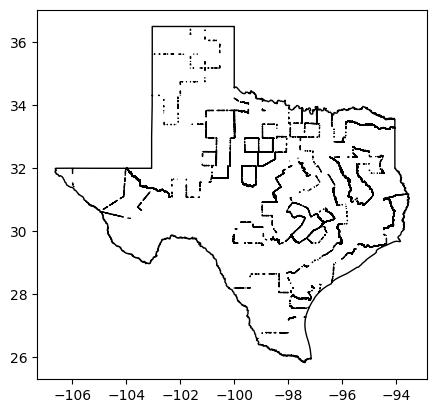

In [492]:
txfile = "TXdissolved.gpkg"
txbnd = gpd.read_file(txfile)
txdis = txbnd.dissolve().to_crs(4326) #bring it to same projection
txdis.plot (edgecolor = "black", facecolor ="none")

In [493]:
len(txdis)

1

In [494]:
txdis #Checking whether they are holes or polygons.. It shows its a hole becuase if its a polygon, it will show as attributes with any geometry

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((-102.32282 29.86645, -102.32274 29.8...",232,232,48463,232,15,Uvalde,232,15,35,267232.254225


In [495]:
txdis["geometry"] = txdis["geometry"].apply(lambda geom: Polygon(geom.exterior))

<Axes: >

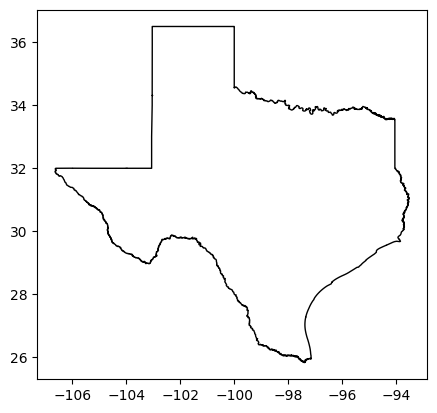

In [496]:
txdis.plot (edgecolor = "black", facecolor ="none")

In [497]:
bridges = gpd.GeoDataFrame(aa,crs="EPSG:4326", 
                           geometry =gpd.points_from_xy(aa["LONDD"],aa["LATDD"]))

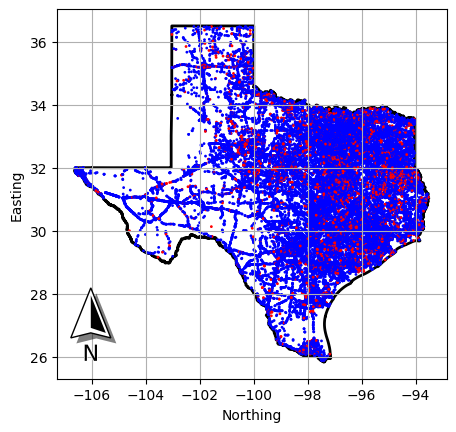

In [498]:
colormap = {0:"blue",1:"red"}
bridges["color"] = bridges['UNSAFE'].map(colormap)
fig,ax = plt.subplots()
txdis.plot(ax=ax,facecolor = "none", edgecolor = "black", linewidth =2)
bridges.plot(ax=ax,color = bridges["color"], markersize = 1)
north_arrow(ax=ax, location='lower left', rotation={"crs": 4326, "reference": "center"})
ax.set_xlabel("Northing")
ax.set_ylabel("Easting")
plt.grid()
plt.show()

In [499]:
finame = "2025Data.csv"
b = pd.read_csv(finame, on_bad_lines="skip",dtype ="str") 
b.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,Y,8,1,2042,NaN,Y,63,F,6,150.72
1,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,Y,8,1,2042,NaN,Y,63,G,7,74.4
2,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,Y,8,150,2042,NaN,Y,63,G,7,91.91
3,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,Y,5,120,2044,NaN,Y,63,P,4,204.3
4,48,000021525-00014,1,6,0,00000,0,02,245,00000,...,Y,5,20,2042,NaN,Y,63,G,7,157.92


In [500]:
len(b)

56951

In [501]:
b.columns

Index(['STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A',
       'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D',
       'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003',
       'PLACE_CODE_004',
       ...
       'BRIDGE_LEN_IND_112', 'SCOUR_CRITICAL_113', 'FUTURE_ADT_114',
       'YEAR_OF_FUTURE_ADT_115', 'MIN_NAV_CLR_MT_116', 'FED_AGENCY',
       'SUBMITTED_BY', 'BRIDGE_CONDITION', 'LOWEST_RATING', 'DECK_AREA'],
      dtype='object', length=123)

In [502]:
b['FID']= b.LAT_016.astype(str)+"_"+b.LONG_017.astype(str)
b['FID']

0        29362100_094272880
1        29362940_094254920
2        29365160_094324020
3        29413300_094044860
4        29412100_094092940
                ...        
56946    31495329_106183492
56947    32430233_096561253
56948    32424987_096560305
56949    32424560_096561340
56950    29283700_098252680
Name: FID, Length: 56951, dtype: object

In [503]:
bb = b[~b.duplicated(subset=['FID'], keep = False)].copy() #removing duplicates in same lat long

In [504]:
bb

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID
0,48,000021521-00101,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,F,6,150.72,29362100_094272880
1,48,000021521-00181,1,6,0,00000,0,02,071,00000,...,8,1,2042,NaN,Y,63,G,7,74.4,29362940_094254920
2,48,000021521-TMP20,1,6,1,00000,0,02,071,00000,...,8,150,2042,NaN,Y,63,G,7,91.91,29365160_094324020
3,48,000021525-00012,1,6,0,00000,0,02,245,00000,...,5,120,2044,NaN,Y,63,P,4,204.3,29413300_094044860
4,48,000021525-00014,1,6,0,00000,0,02,245,00000,...,5,20,2042,NaN,Y,63,G,7,157.92,29412100_094092940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56946,48,DAPTRABLI018560,1,8,0,00000,0,24,141,26664,...,N,500,2046,NaN,Y,74,G,7,3542.06,31495329_106183492
56947,48,NCA1,1,6,0,00000,0,00,113,19000,...,5,106,2041,NaN,Y,56,F,6,341.28,32430233_096561253
56948,48,NCA2,1,6,0,00000,0,00,113,19000,...,5,106,2041,NaN,Y,56,F,5,141.68,32424987_096560305
56949,48,NCA3,1,6,0,00000,0,00,113,19000,...,7,106,2041,NaN,Y,56,F,6,364.81,32424560_096561340


In [505]:
len(bb)

56847

In [506]:
new_records = bb[~bb["FID"].isin(aa["FID"])]
len(new_records)

52172

In [507]:
dat2025 = dataprep(new_records)
dat2025.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,FID,AGE,LATDD,LONDD,UNSAFE
17,48,010600013603019,1,3,1,00024,0,01,119,00000,...,N,48,F,6,98.6,33184193_095492433,8.0,33.311647,-95.823425,0
18,48,010600013603026,1,3,1,00024,0,01,119,00000,...,N,48,G,7,116.62,33200637_095460208,7.0,33.335103,-95.767244,0
19,48,010600013603028,1,3,1,00024,0,01,119,00000,...,N,48,F,5,584.24,33214533_095432060,65.0,33.362592,-95.722389,1
20,48,010600013603083,1,3,1,00024,0,01,119,00000,...,N,48,F,6,142.71,33225734_095413334,57.0,33.382594,-95.692594,0
21,48,010600013603131,1,3,1,00024,0,01,119,75448,...,N,48,G,7,1115.08,33180357_095505198,6.0,33.300992,-95.847772,0


In [508]:
dat2025.columns


Index(['STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A',
       'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D',
       'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003',
       'PLACE_CODE_004',
       ...
       'FED_AGENCY', 'SUBMITTED_BY', 'BRIDGE_CONDITION', 'LOWEST_RATING',
       'DECK_AREA', 'FID', 'AGE', 'LATDD', 'LONDD', 'UNSAFE'],
      dtype='object', length=128)

In [509]:
#STRUCTURE_KIND_043A, ADT_029, 'FID', 'LATDD', 'LONDD', 'UNSAFE', 'AGE' ;#YEAR_RECONSTRUCTED_106
aa ["YEAR_RECONSTRUCTED_106"] = pd.to_numeric(aa["YEAR_RECONSTRUCTED_106"],errors='coerce')
aa['RECON']=np.where(aa.YEAR_RECONSTRUCTED_106>0,1,0)
dat2025["YEAR_RECONSTRUCTED_106"]=pd.to_numeric(dat2025["YEAR_RECONSTRUCTED_106"], errors= 'coerce') 
dat2025['RECON']=np.where(dat2025.YEAR_RECONSTRUCTED_106>0,1,0)

In [511]:
cols = ['FID', 'LATDD',	'LONDD', 'AGE', 'RECON', 'ADT_029', 'STRUCTURE_KIND_043A']
bb = aa.copy()
bb = bb.loc[:,cols]
bb.to_csv("NBIFINAL2024.csv", index =False)

In [ ]:
bb = 